In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
cancer = pd.read_csv('breast_cancer.csv')
print(cancer.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


### The dataset consists of 569 data points, with 32 features each:

In [4]:
print("dimension of cancer data: {}".format(cancer.shape))

dimension of cancer data: (569, 33)


In [5]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Of these 569 data points, 212 are labeled as malignant and 357 as benign:

In [6]:
print(cancer.groupby('diagnosis').size())

diagnosis
B    357
M    212
dtype: int64


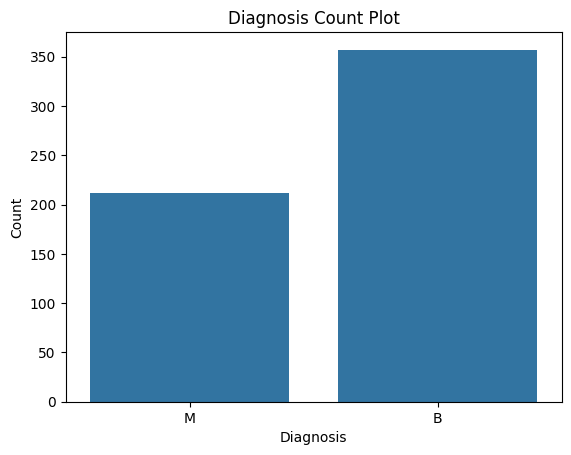

In [7]:
# Assuming 'diagnosis' is a column in the 'cancer' DataFrame
sns.countplot(data=cancer, x='diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Diagnosis Count Plot')
plt.show()


In [8]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

We do not need "id" column for our analysis

In [9]:
cancer.drop('id', axis=1, inplace=True)

### k-Nearest Neighbors

The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”

### Let’s investigate whether we can confirm the connection between model complexity and accuracy

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.loc[:, cancer.columns != 'diagnosis'], cancer['diagnosis'], stratify=cancer['diagnosis'], random_state=66)

C:\Users\SsDsS\AppData\Roaming\Python\Python311\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\SsDsS\AppData\Roaming\Python\Python311\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


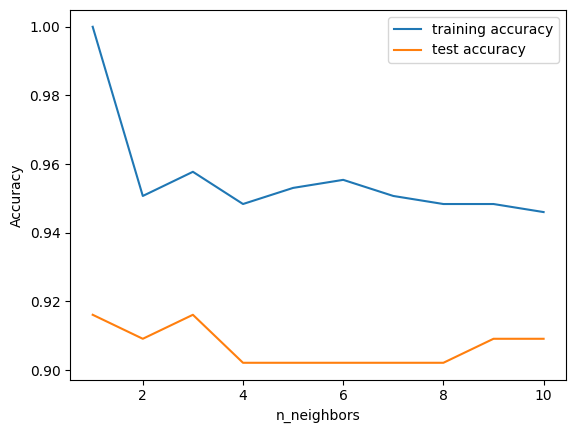

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Assuming you have your data in X_train and X_test
# Create and fit an imputer to handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_imputed, y_train)  # Use the imputed data
    # record training set accuracy
    training_accuracy.append(knn.score(X_train_imputed, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test_imputed, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model.png')


The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. Considering a single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the training accuracy drops, indicating that using the single nearest neighbor leads to a model that is too complex.

The best performance is somewhere around three neighbors. Still, it is good to keep the scale of the plot in mind. The worst performance is more than 90% accuracy, which might still be pretty good.

The above plot suggests that we should shoose n_neighbors=3. Here we are:

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
import warnings

# Create and fit an imputer to handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_imputed, y_train)  # Use the imputed data

# Model evaluation
train_accuracy = knn.score(X_train_imputed, y_train)
test_accuracy = knn.score(X_test_imputed, y_test)

# Suppress specific warning
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.impute._base")

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(train_accuracy))
print('Accuracy of K-NN classifier on the test set: {:.2f}'.format(test_accuracy))


Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on the test set: 0.92


C:\Users\SsDsS\AppData\Roaming\Python\Python311\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\SsDsS\AppData\Roaming\Python\Python311\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


### Logistic Regression

One of the most common linear classification algorithms is logistic regression. Despite its name, LogisticRegression is a classification algorithm and not a regression algorithm.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import warnings

# Create and fit an imputer to handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)  # You may need to increase max_iter if necessary
logreg.fit(X_train_imputed, y_train)  # Use the imputed data

# Suppress ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.linear_model")

# Model evaluation
train_score = logreg.score(X_train_imputed, y_train)
test_score = logreg.score(X_test_imputed, y_test)

print("Training set score: {:.3f}".format(train_score))
print("Test set score: {:.3f}".format(test_score))


Training set score: 0.958
Test set score: 0.937


C:\Users\SsDsS\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The default value of C=1 provides quite good performance, with 96% accuracy on training and 0.94 accuracy on test set. Let’s try to increase C to fit a more flexible model to see whether we can improve the performance.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Create and fit an imputer to handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Logistic Regression
logreg100 = LogisticRegression(C=100, max_iter=1000)  # You may need to increase max_iter if necessary
logreg100.fit(X_train_imputed, y_train)  # Use the imputed data

# Model evaluation
train_score = logreg100.score(X_train_imputed, y_train)
test_score = logreg100.score(X_test_imputed, y_test)

print("Training set score: {:.3f}".format(train_score))
print("Test set score: {:.3f}".format(test_score))


Training set score: 0.969
Test set score: 0.972


Using C=100 results in higher accuracy on both training set and test set, confirming that less regularization and a more complex model should perform better.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Create and fit an imputer to handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Logistic Regression
logreg001 = LogisticRegression(C=0.01)
logreg001.fit(X_train_imputed, y_train)  # Use the imputed data

train_score = logreg001.score(X_train_imputed, y_train)
test_score = logreg001.score(X_test_imputed, y_test)

print("Training set score: {:.3f}".format(train_score))
print("Test set score: {:.3f}".format(test_score))


Training set score: 0.948
Test set score: 0.895


Using C=0.01 results in lower accuracy on the training set and much lower accuracy on the test set, indicates our model doesn’t generalize well from our training data to unseen data. With C=0.01, overfitting occurs.

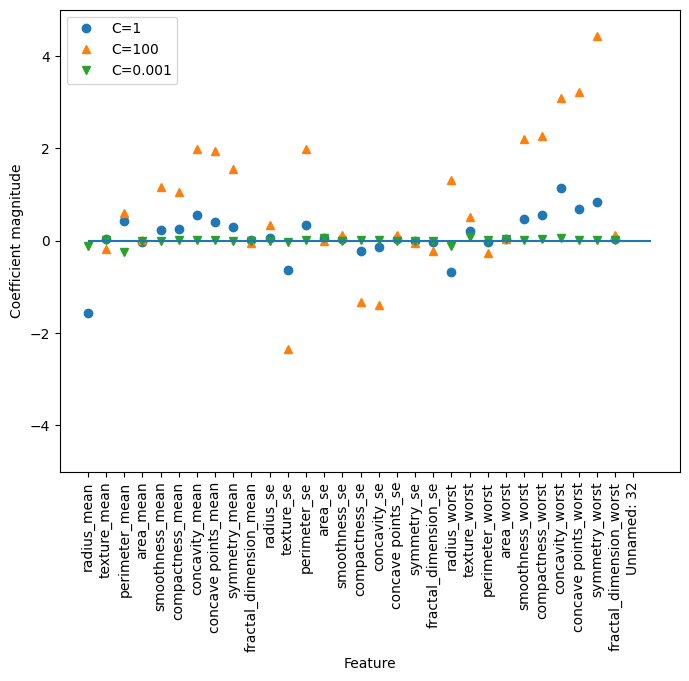

In [16]:
cancer_features = [x for i, x in enumerate(cancer.columns) if i != 0]

plt.figure(figsize=(8, 6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")

# Make sure the number of ticks (labels) matches the number of features
plt.xticks(range(len(cancer_features)), cancer_features, rotation=90)

plt.hlines(0, 0, len(cancer_features))
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.savefig('log_coef')


### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.951


In [18]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.986
Accuracy on test set: 0.937


### Feature importance in trees
feature importance rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1:

In [19]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.00913863 0.         0.02299068 0.         0.
 0.         0.02434299 0.         0.         0.         0.
 0.01644953 0.         0.         0.         0.         0.
 0.         0.         0.         0.05129478 0.76882622 0.
 0.         0.01013634 0.         0.09682083 0.         0.
 0.        ]


We can then visualize the feature importances.

In [20]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
cancer_features = data.feature_names.tolist()


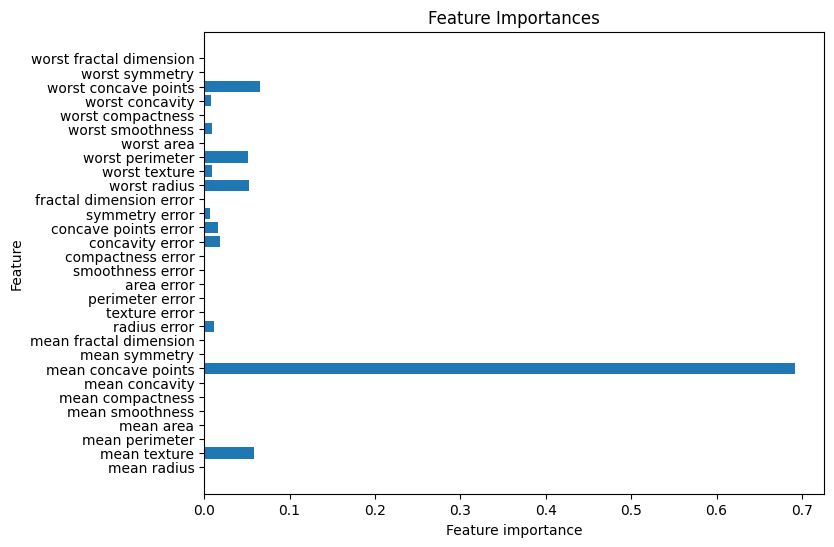

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Target labels

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose and create the model
model = DecisionTreeClassifier()

# Fit the model with your training data
model.fit(X_train, y_train)

# Now you can extract feature importances and plot them
cancer_features = data.feature_names  # Get the feature names from the dataset
def plot_feature_importances_cancer(model):
    plt.figure(figsize=(8, 6))
    n_features = len(cancer_features)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(range(n_features), cancer_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title("Feature Importances")
    plt.show()

plot_feature_importances_cancer(model)


Feature perimeter_worst is by far the most important feature. This confirms our observation in analyzing the tree that the first level already separates the two classes fairly well.

### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Create and fit an imputer to handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

rf = RandomForestClassifier()
rf.fit(X_train_imputed, y_train)

# Model evaluation
train_accuracy = rf.score(X_train_imputed, y_train)
test_accuracy = rf.score(X_test_imputed, y_test)

print("Accuracy on training set: {:.3f}".format(train_accuracy))
print("Accuracy on test set: {:.3f}".format(test_accuracy))


Accuracy on training set: 1.000
Accuracy on test set: 0.965


The random forest gives us an accuracy of 95.8%, better than a single decision tree, without tuning any parameters.

### Feature importance in Random Forest

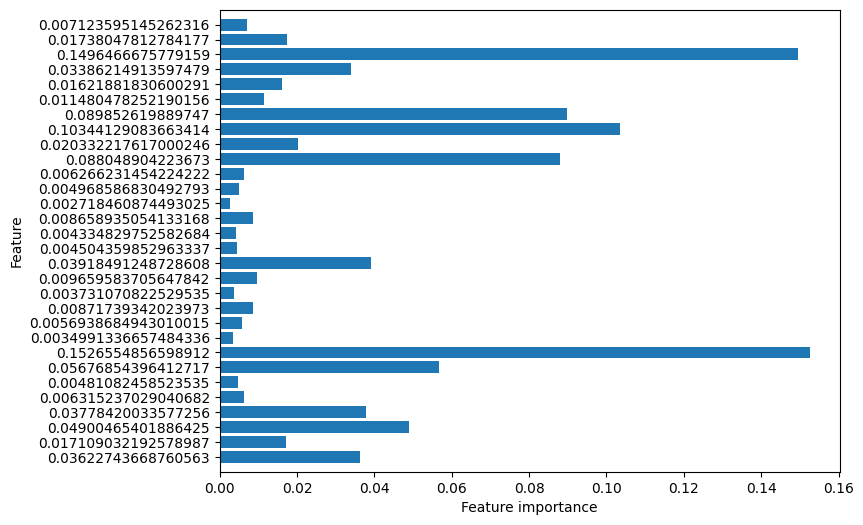

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the RandomForestClassifier with imputed data
rf = RandomForestClassifier()
rf.fit(X_train_imputed, y_train)

# Plot feature importances
def plot_feature_importances_cancer(model):
    plt.figure(figsize=(8, 6))
    n_features = len(model.feature_importances_)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), model.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(rf)
plt.savefig('feature_importance')


Similarly to the single decision tree, the random forest also gives a lot of importance to the “worst radius” feature, but it also chooses “perimeter worst” to be the most informative feature overall. The randomness in building the random forest forces the algorithm to consider many possible explanations, the result being that the random forest captures a much broader picture of the data than a single tree.

### Gradient Boosting

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and fit an imputer to handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train_imputed, y_train)

# Model evaluation
train_accuracy = gb.score(X_train_imputed, y_train)
test_accuracy = gb.score(X_test_imputed, y_test)

print('Accuracy of Gradient Boosting Classifier on training set: {:.3f}'.format(train_accuracy))
print('Accuracy of Gradient Boosting Classifier on the test set: {:.3f}'.format(test_accuracy))


Accuracy of Gradient Boosting Classifier on training set: 1.000
Accuracy of Gradient Boosting Classifier on the test set: 0.956


As the training set accuracy is 100%, we are likely to be overfitting. To reduce overfitting, we could either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate:

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and fit an imputer to handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Gradient Boosting Classifier
gb1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gb1.fit(X_train_imputed, y_train)

# Model evaluation
train_accuracy = gb1.score(X_train_imputed, y_train)
test_accuracy = gb1.score(X_test_imputed, y_test)

print('Accuracy of Gradient Boosting Classifier (max_depth=1) on training set: {:.3f}'.format(train_accuracy))
print('Accuracy of Gradient Boosting Classifier (max_depth=1) on the test set: {:.3f}'.format(test_accuracy))


Accuracy of Gradient Boosting Classifier (max_depth=1) on training set: 0.991
Accuracy of Gradient Boosting Classifier (max_depth=1) on the test set: 0.956


In [26]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and fit an imputer to handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Gradient Boosting Classifier with learning rate 0.01
gb2 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gb2.fit(X_train_imputed, y_train)

# Model evaluation
train_accuracy = gb2.score(X_train_imputed, y_train)
test_accuracy = gb2.score(X_test_imputed, y_test)

print('Accuracy of Gradient Boosting Classifier (learning_rate=0.01) on training set: {:.3f}'.format(train_accuracy))
print('Accuracy of Gradient Boosting Classifier (learning_rate=0.01) on the test set: {:.3f}'.format(test_accuracy))


Accuracy of Gradient Boosting Classifier (learning_rate=0.01) on training set: 0.987
Accuracy of Gradient Boosting Classifier (learning_rate=0.01) on the test set: 0.956


Both methods of decreasing the model complexity reduced the training set accuracy, as expected. In this case, none of these methods increased the generalization performance of the test set.

Still, we can visualize the feature importances to get more insight into our model even though we are not really happy with the model.

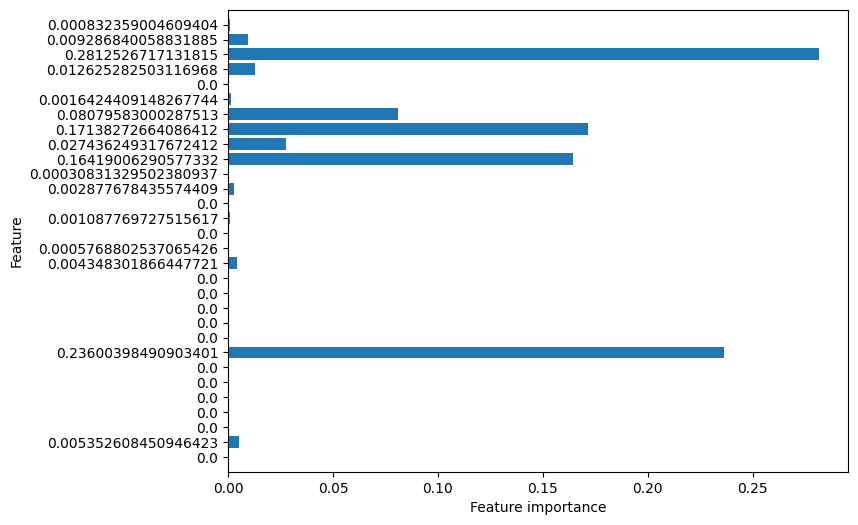

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and fit an imputer to handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Gradient Boosting Classifier with max depth 1
gb = GradientBoostingClassifier(random_state=0, max_depth=1)
gb.fit(X_train_imputed, y_train)

# Plot feature importances
plot_feature_importances_cancer(gb)


We can see that the feature importances of the gradient boosted trees are somewhat similar to the feature importances of the random forests, though the gradient boosting completely ignored some of the features.

### Support Vector Machine

In [28]:
from sklearn.svm import SVC

# Create and fit an imputer to handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Support Vector Classifier (SVC)
svc = SVC()
svc.fit(X_train_imputed, y_train)

# Print accuracy on the training and test sets
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_imputed, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_imputed, y_test)))


Accuracy on training set: 0.91
Accuracy on test set: 0.95


The model overfits quite substantially, with a perfect score on the training set and only 63% accuracy on the test set.

SVM requires all the features to vary on a similar scale. We will need to rescale our data that all the features are approximately on the same scale:

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

# Create and fit an imputer to handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Apply feature scaling (MinMaxScaler)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Support Vector Classifier (SVC)
svc = SVC()
svc.fit(X_train_scaled, y_train)

# Print accuracy on the training and test sets
print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaled, y_test)))


Accuracy on training set: 0.98
Accuracy on test set: 0.97


Scaling the data made a huge difference! Now we are actually in an underfitting regime, where training and test set performance are quite similar but less close to 100% accuracy. From here, we can try increasing either C or gamma to fit a more complex model.

In [30]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.939


Here, increasing C allows us to improve the model significantly, resulting in 96.5% test set accuracy.

### Neural Networks

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer

# Create and fit an imputer to handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and train an MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_imputed, y_train)

# Print accuracy on the training and test sets
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train_imputed, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test_imputed, y_test)))


Accuracy on training set: 0.94
Accuracy on test set: 0.94


This is likely due to scaling of the data. Neural networks also expect all input features to vary in a similar way, and ideally to have a mean of 0, and a variance of 1. We must rescale our data so that it fulfills these requirements.

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier

# Create and fit an imputer to handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and fit a scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Create and train an MLPClassifier
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

# Print accuracy on the training and test sets
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))


Accuracy on training set: 0.980
Accuracy on test set: 0.974


C:\Users\SsDsS\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The results are much better after scaling, and already quite competitive.

In [33]:
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier

# Create and fit an imputer to handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create and train an MLPClassifier
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_imputed, y_train)

# Print accuracy on the training and test sets
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_imputed, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_imputed, y_test)))


Accuracy on training set: 0.936
Accuracy on test set: 0.956


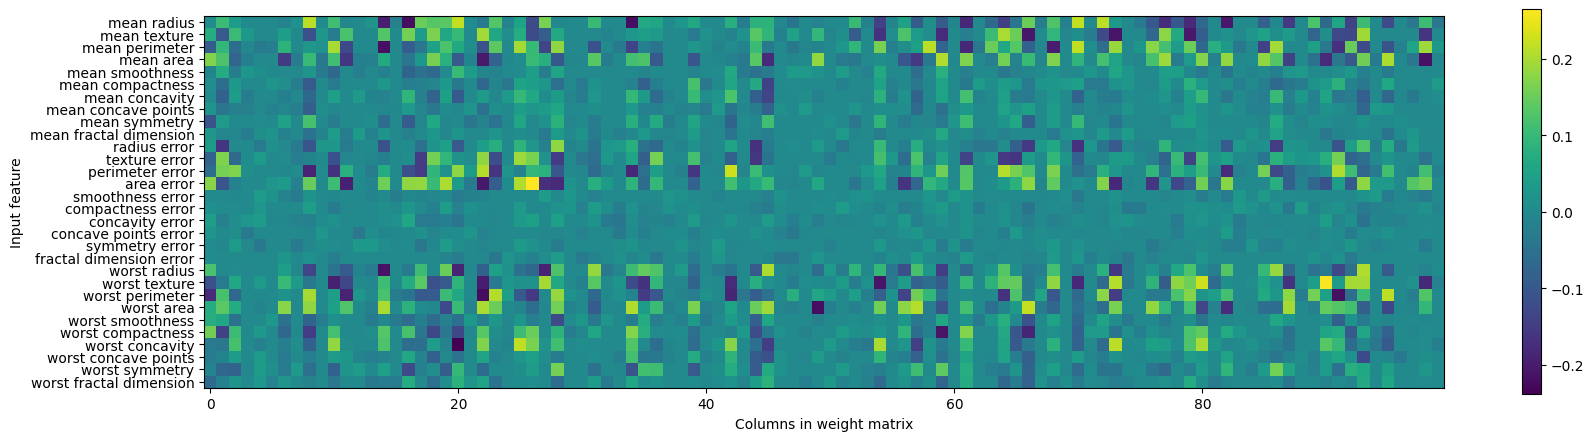

In [34]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(len(cancer_features)), cancer_features)  # Set numerical tick locations
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()


The above plot shows the weights that were learned connecting the input to the first hidden layer. The rows in this plot correspond to the 30 input features, while the columns correspond to the 100 hidden units. Light colors represent large positive values, while dark colors represent negative values.

One possible inference we can make is that features that have very small weights for all of the hidden units are “less important” to the model. We can see that “mean smoothness” and “mean compactness,” in addition to the features found between “smoothness error” and “fractal dimension error,” have relatively low weights compared to other features. This could mean that these are less important features or possibly that we didn’t represent them in a way that the neural network could use.